# Search algorithms

## Introduction
Related to numerical methods, a search algorithm is:
> any algorithm which solves the "search problem".

Then, the "search problem" is, intuitively:
> consisting of finding structure 'y' in object 'x'. An algorithm is said to solve the problem if at least one corresponding structure exists, and then one occurrence of this structure is the output; otherwise, the problem continues.

In other words, searching is the algorithmic method of finding a particular item in a collection of items, resulting in true or false as to whether the item exists.

## Solving mazes
> A maze is one or more paths from an entrance to an exit
> ![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Maze_simple.svg/1024px-Maze_simple.svg.png)

### Wall follower
By keeping one hand in contact with one wall, the solver is guaranteed to find a path and reach the exit if there is one, albeit not very efficiently. 

![](https://upload.wikimedia.org/wikipedia/commons/f/f7/Maze01-02.png)
However, this maze must be simply-connected (i.e. the start and end are on the outside walls, there are no pathways crossing over).

### Tremaux's algorithm
An algorithm, invented by Charles Pierre Tremaux, requires drawing lines on the floor to mark a path.
> A path is either unvisited, marked once, or twice. Every time a direction is chosen it is marked by a line on the ground. In the beginning, a random direction is chosen if there is more than one. On arriving at a junction unvisited, pick a random direction and mark that path. When arriving at a marked junction and the current path is only marked once, turn around, walk back, and mark that path a second time. When turning back, pick the direction with the fewest marks (mark it). At the end, paths marked once will indicate a way back to the start.

Rules:
- A path from a junction is either unvisited, once, or twice
- Never enter a path marked twice

# Breadth first search
One such algorithm is breadth-first-search. With this algorithm, you start traversing from the start node and then traverse the maze layerwise, thus exploring the neighbor nodes. Then, the next-level neighbor nodes are visited, and so on.

As the name implies, the maze is travelled breadthwise:
- First move horizontally and visit all paths of the current layer
- Move to the next layer

In [1]:
maze = []
with open("maze.txt", 'r') as file:
    for line in file:
        line = line.rstrip()
        row = []
        for block in line:
            if block == ' ':
                row.append(0) # path
            else:
                row.append(1) # wall
        maze.append(row)
# process maze file
print(maze)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 0,

<ipython-input-2-b7b22236aa6a>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().invert_yaxis()


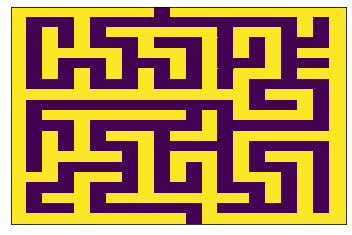

In [2]:
# plot maze
import matplotlib.pyplot as plt
plt.pcolormesh(maze)
plt.xticks([])
plt.yticks([])
plt.axes().invert_yaxis()
plt.show()

In [3]:
# empty map
map = []
for i in range(len(maze)):
    row = []
    for j in range(len(maze[i])):
        row.append(0)
    map.append(row)

# setup
start = 0,9
end = 20,11
map[start[0]][start[1]] = 1

In [4]:
def do_step(step):
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if map[i][j] == step:
                if i > 0 and map[i-1][j] == 0 and maze[i-1][j] == 0: # top
                    map[i-1][j] = step + 1
                if j > 0 and map[i][j-1] == 0 and maze[i][j-1] == 0: # left
                    map[i][j-1] = step + 1
                if i < len(maze)-1 and map[i+1][j] == 0 and maze[i+1][j] == 0: # bottom
                    map[i+1][j] = step + 1
                if j < len(maze[i])-1 and map[i][j+1] == 0 and maze[i][j+1] == 0: # right
                    map[i][j+1] = step + 1

In [5]:
# loop until end is reached
step = 0
while map[end[0]][end[1]] == 0:
    step += 1
    do_step(step)

<ipython-input-6-bc9874fbf107>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().invert_yaxis()


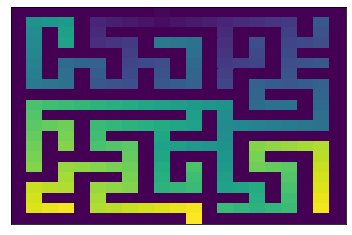

In [6]:
plt.pcolormesh(map)
plt.xticks([])
plt.yticks([])
plt.axes().invert_yaxis()
plt.show()

In [7]:
i, j = end
step = map[i][j]
x,y = [i],[j]

while step > 1:
    if i > 0 and map[i-1][j] == (step-1): # top
        i,j = i-1,j
        x.append(i)
        y.append(j)
        step -= 1
    if j > 0 and map[i][j-1] == (step-1): # left
        i,j = i,j-1
        x.append(i)
        y.append(j)
        step -= 1
    if i < len(maze)-1 and map[i+1][j] == (step-1): # bottom
        i,j = i+1,j
        x.append(i)
        y.append(j)
        step -= 1
    if j < len(maze[i])-1 and map[i][j+1] == (step-1): # right
        i,j = i,j+1
        x.append(i)
        y.append(j)
        step -= 1

<ipython-input-13-7a098f2d088f>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().invert_xaxis()


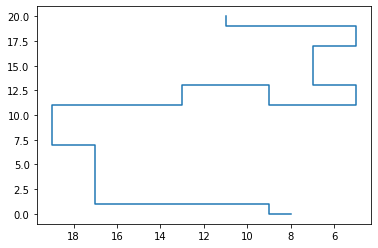

In [13]:
plt.plot(y,x)
plt.axes().invert_xaxis()
plt.show()